<a href="https://colab.research.google.com/github/manon-jennepin/landing/blob/main/Introduction_to_Inequality_Measurement_Group_Project_n5_South_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Introduction to Inequality Measurement Group project 5 South Africa")

Introduction to Inequality Measurement Group project 5 South Africa


In [2]:
#Code cell number: 1
!pip install quantecon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 6.4 MB/s eta 0:00:00


In [3]:
#Code cell number: 2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantecon as qe
pd.set_option('display.max_rows', 500)
plt.rcParams["figure.figsize"] = (5, 5)
cmap = plt.colormaps["tab20"]
colors = cmap.colors

In [5]:
import pandas as pd
from google.colab import files
import io

data_to_load = files.upload()
first_key = list(data_to_load.keys())[0]

# Use pd.read_csv instead of pd.read_excel since the file is a CSV
df = pd.read_csv(io.BytesIO(data_to_load[first_key]))

Saving dataset#05.csv to dataset#05 (2).csv


In [7]:
#Code cell number: 4
# The data is already stored in the 'df' variable from the previous cell.
# We need to convert the 'income' column to strings (if it's not already) and then split by ';'.
# Assuming the income data is in a single column named 'income'

# Convert the 'income' column to strings if it's not already
df['income'] = df['income'].astype(str)

# Split the 'income' column by ';' and expand into multiple columns
df = df['income'].str.split(';', expand=True)

# Rename the new columns (you may need to adjust the column names)
df.columns = ['income']

# Convert the 'income' column to integers
df['income'] = df['income'].astype(int)

df.index += 1
df.head(10000)

,income
1,86
2,52
3,70
4,50
5,72
...,...
9996,62
9997,72
9998,69
9999,635


In [8]:
#Code cell number: 5
df = df.sort_values(by='income')
df1 = df.copy()
df1['Q'] = pd.qcut(df1['income'], 5, labels=False) + 1
quintile_totals = df1.groupby('Q')['income'].sum()
total_income = df1['income'].sum()
quintile_percentages = (quintile_totals / total_income) * 100
result = pd.DataFrame({'Income': quintile_totals, 'Income %': quintile_percentages })
print(result)

    Income   Income %
Q                    
1   114194   4.408878
2   143108   5.525209
3   165986   6.408498
4   589212  22.748690
5  1577592  60.908724


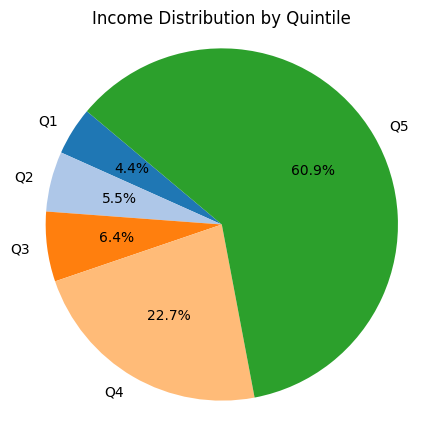

In [9]:
#Code cell number: 6
labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
plt.pie(quintile_percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Income Distribution by Quintile')
plt.axis('equal')
plt.show()

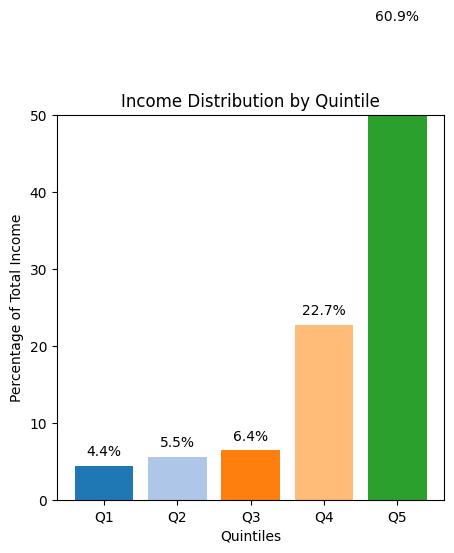

In [10]:
#Code cell number: 7
plt.bar(labels, quintile_percentages, color=colors)
plt.xlabel('Quintiles')
plt.ylabel('Percentage of Total Income')
plt.title('Income Distribution by Quintile')
plt.ylim(0, 50)
for i, v in enumerate(quintile_percentages): plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
plt.show()

In [11]:
#Code cell number: 8
df2 = df.copy()
df2 = df2.sort_values(by=['income'])
df2['D'] = pd.qcut(df1['income'], 10, labels=False) + 1
decile_totals = df2.groupby('D')['income'].sum()
total_income_decile = df2['income'].sum()
decile_percentages = (decile_totals / total_income_decile) * 100
result = pd.DataFrame({'Income': decile_totals, 'Income %': decile_percentages })
print(result)

    Income   Income %
D                    
1    54939   2.121122
2    59255   2.287757
3    71083   2.744420
4    72025   2.780789
5    77424   2.989237
6    88562   3.419261
7   105139   4.059277
8   484073  18.689413
9   739977  28.569526
10  837615  32.339199


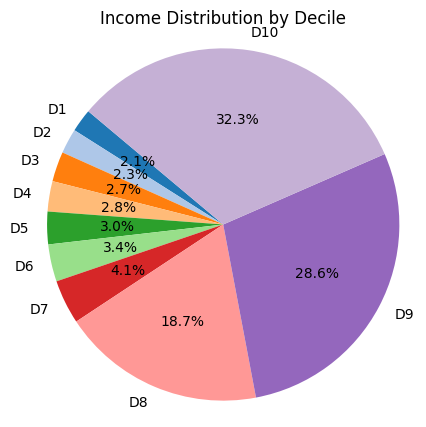

In [12]:
#Code cell number: 9
labels = ['D'+str(k) for k in range(1,11)]
plt.pie(decile_percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('Income Distribution by Decile')
plt.axis('equal')
plt.show()

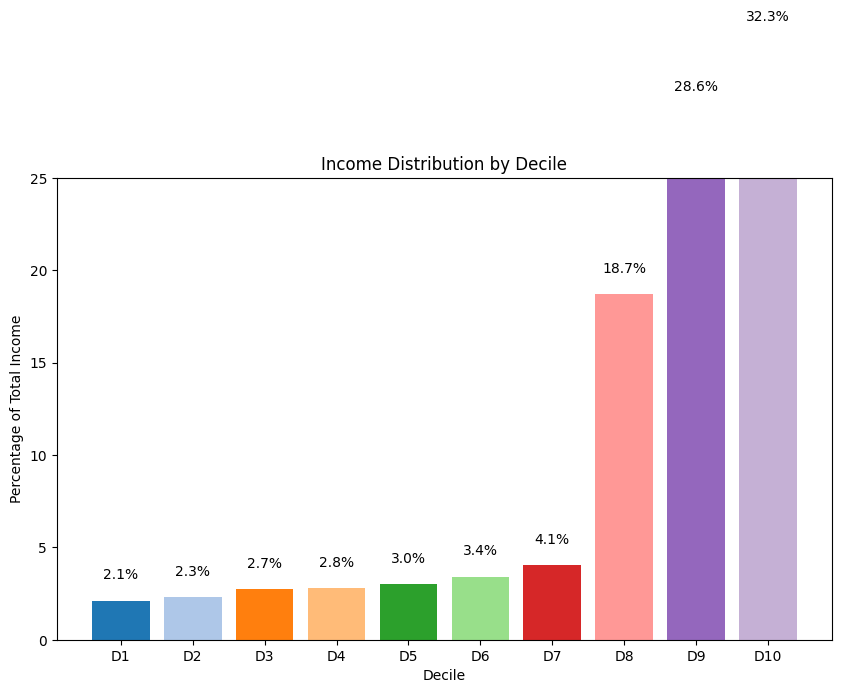

In [13]:
#Code cell number: 10
plt.figure(figsize=(10,6))
plt.bar(labels, decile_percentages, color=colors)
plt.xlabel('Decile')
plt.ylabel('Percentage of Total Income')
plt.title('Income Distribution by Decile')
plt.ylim(0, 25)
for i, v in enumerate(decile_percentages): plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')
plt.show()

In [14]:
#Code cell number: 10
def gini(data):
  data = np.cumsum(data)*0.0005
  total = data[0]
  for i in range(9):
      total += data[i]+data[i+1]
  return (1-2*total)

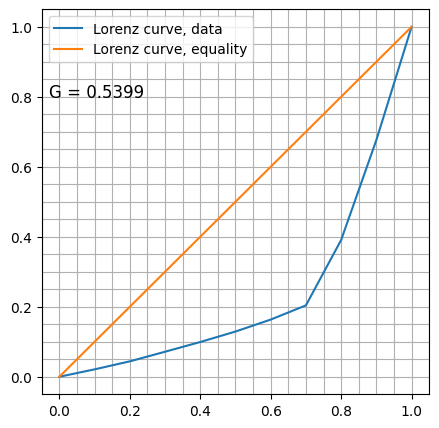

In [15]:
array = decile_percentages.to_numpy()
f_vals, l_vals = qe.lorenz_curve(array)
fig, ax = plt.subplots()
ax.plot(f_vals, l_vals, label='Lorenz curve, data')
ax.plot(f_vals, f_vals, label='Lorenz curve, equality')
ax.legend()
ax.text(-0.03, 0.8, 'G = '+ str(round(gini(array),4)), fontsize = 12)
ax.grid(which = "both")
ax.minorticks_on()
ax.tick_params(which = "minor", bottom = False, left = False)
plt.show()